In [16]:
import numpy as np
import matplotlib.pyplot as plt

def distance(p1,p2):
    """Find distance between 2 points"""
    return np.sqrt(np.sum(np.power(p2-p1,2)))
    
p1=np.array([1,1])
p2=np.array([4,4])
distance(p1,p2)


4.242640687119285

In [17]:
import random
import scipy.stats as ss
def majority_votes_short(votes):
    """
    Return the most elemment in votes
    """
    mode, count = ss.mstats.mode(votes)
    return random.choice(mode)
def majority_votes(votes):
    """
    Majority vote about something
    """
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1
    winners=[]
    max_count=max(vote_counts.values())
    for vote, count in vote_counts.items():
          if count == max_count:
                  winners.append(vote)
    return random.choice(winners)

votes=[1,1,3,1,1,2,3,2,1,2,2,1,2,2]
winner1=majority_votes_short(votes)

print(winner1)

1.0


1

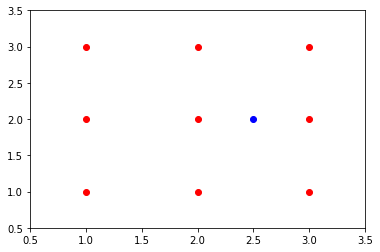

In [10]:
#Para knn necesitamos:
#Loop entre todos los puntos inicialmente:
#calcular las distancias entre el punto P y cada uno de los puntos
#Organizar las distancias de esos k puntos que son más cercanos al punto P.
import matplotlib.pyplot as plt

def find_nearest_neighboors(p,points,k=5):
    """
    This function find the k nearest neighboor of p in the list points
    """
    distances=np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes,k=5):
    """
    This function predict knn depends on an outcomes
    """
    ind = find_nearest_neighboors(p,points,k)
    return majority_votes(outcomes[ind])


points =np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
outcomes =np.array([0,0,0,0,1,1,1,1,1])
p=np.array([2.5,2])
plt.plot(points[:,0],points[:,1],'ro')
plt.plot(p[0],p[1],'bo')
plt.axis([0.5,3.5,0.5,3.5])
ind=find_nearest_neighboors(p,points,3)


knn_predict(np.array([2.5,2.7]), points, outcomes,2)


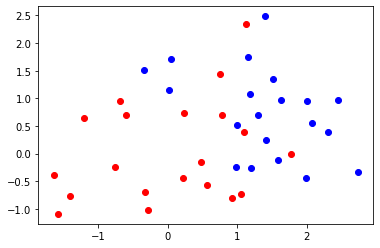

In [18]:
def generate_syntetic_data(n=50):
    """
    Create two set of points from bivariate normal distributions
    """
    points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

n=20
(points,outcomes)=generate_syntetic_data(n)
plt.figure()
plt.plot(points[:n,0],points[:n,1],'ro')
plt.plot(points[n:,0],points[n:,1],'bo')
plt.savefig('bivaridedata.pdf')

In [19]:
def make_prediction_grid(limits, predictors, outcomes, h, k):
    """ Classify each point in the prediction grid
    """
    (x_min,x_max, y_min, y_max)=limits
    xs=np.arange(x_min,x_max, h)
    ys=np.arange(y_min,y_max, h)
    xx , yy=np.meshgrid(xs,ys)
    prediction_grid=np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array([[x,y]])
            prediction_grid[j,i]=knn_predict(p, predictors, outcomes,k=5)
    return xx, yy, prediction_grid




In [27]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

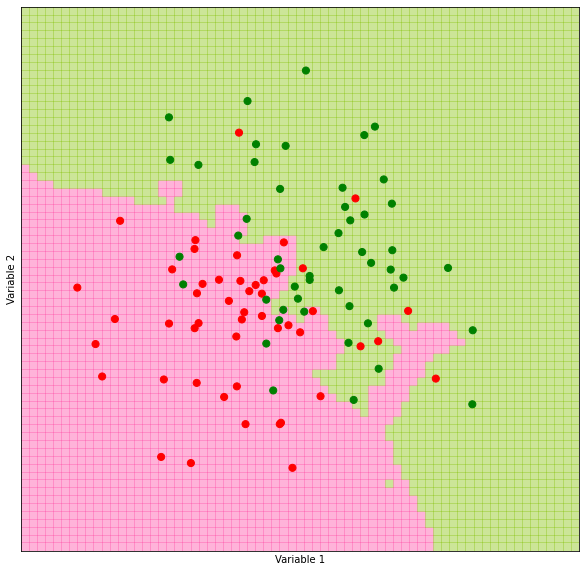

In [28]:
(predictors,outcomes) = generate_syntetic_data()
k=5; filename="knn_synth_5.pdf"; limits=(-3,4,-3,4); h=0.1
xx, yy, prediction_grid=make_prediction_grid(limits, predictors, outcomes, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)



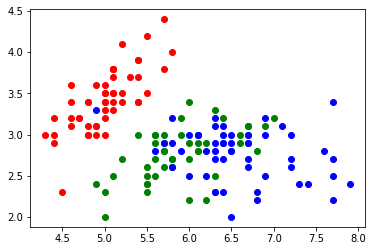

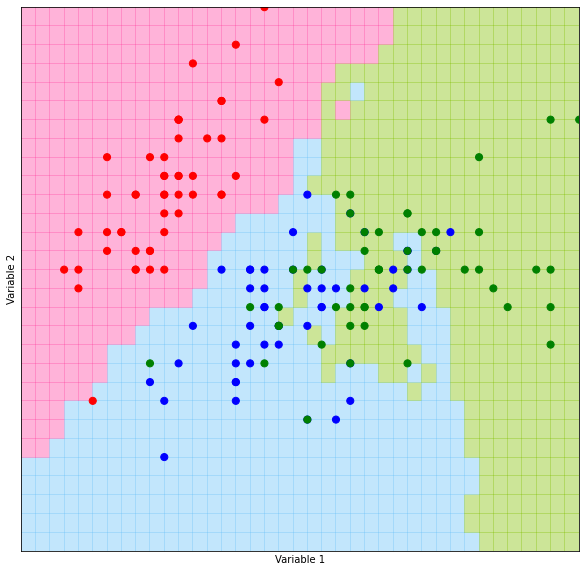

In [31]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris=datasets.load_iris() #150 observatios(rows) - 4 covariates(columns)
iris["data"]
predictors=iris.data[:,0:2]
outcomes=iris.target
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==1][:,1],"bo")
k=5; filename="knn_synth_5.pdf"; limits=(4,8,1.5,4.5); h=0.1
xx, yy, prediction_grid=make_prediction_grid(limits, predictors, outcomes, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_predictions=knn.predict(predictors)
sk_predictions.shape

my_predictios=np.array([knn_predict(p, predictors,outcomes,5) for p in predictors])
np.mean(my_predictios==sk_predictions)*100
print(np.mean(my_predictios==outcomes)*100)
print(np.mean(sk_predictions==outcomes)*100)

84.66666666666667
83.33333333333334
